In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loading

In [ ]:
df_orig = pd.read_table('./XYZCorp_LendingData.txt', delimiter='\t')



In [ ]:
df = df_orig.copy(True)

# Encoding categorical variables

In [ ]:
df['application_type_n'] = df['application_type'].apply(lambda x: {'INDIVIDUAL':0,'JOINT':1}[x])
df = pd.concat([df, pd.get_dummies(df['verification_status'], drop_first=True)], axis=1)
df['initial_list_status_n'] = df['initial_list_status'].apply(lambda x: {'f':0, 'w':1}[x])
df['term_c'] = df['term'].apply(lambda x: {' 36 months':0, ' 60 months':1}[x])
df['grade_c'] = df['grade'].apply(lambda x: {'A':0,'B':0,'C':0,'D':1,'E':1,'F':1,'G':1}[x])
df['home_ownership'].apply(lambda x: {'NONE':'OTHER', 'ANY': 'OTHER'}.get(x, x)).unique()
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['month'] = df['last_credit_pull_d'].apply(lambda x: x.month)
df['year'] = df['last_credit_pull_d'].apply(lambda x: x.year)
df['mths_since_last_delinq_nan'] = df['mths_since_last_delinq'].isnull().astype(int)
df['mths_since_last_delinq'].fillna(-1, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0.0).astype(int)
df['mths_since_last_major_derog_nan'] = df['mths_since_last_major_derog'].isnull().astype(int)
df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(-1)
df['month'].fillna(df['month'].mode()[0], inplace=True)
df = pd.concat([df, pd.get_dummies(df['month'], drop_first=True)], axis=1)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df = pd.concat([df, pd.get_dummies(df['emp_length'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['purpose'], drop_first=True)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['addr_state'], drop_first=True)], axis=1) # No impactó al rendimiento




In [ ]:
df_orig['purpose'].value_counts()

# Eliminar columnas innecesarias

In [ ]:
df = df.drop(['mths_since_last_record','id','member_id','tot_cur_bal', 'total_rev_hi_lim', 'policy_code', 'issue_d'], axis=1, errors='ignore')


In [ ]:
df = df.drop([
    'term', 
    'emp_title', 
    'emp_length', 
    'grade', 
    'sub_grade', 
    'home_ownership', 
    'verification_status',
    'pymnt_plan',
    'desc',
    'purpose',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'initial_list_status',
    'last_pymnt_d',
    'next_pymnt_d',
    'last_credit_pull_d',
    'application_type',
    'verification_status_joint',
    'month'
    ], axis=1, errors='ignore')

In [ ]:
df = df.drop([
    'mths_since_last_delinq',
], axis=1, errors='ignore')

In [ ]:
df.select_dtypes(['object'])

In [ ]:
dfnan = df.isnull().sum()
dfnan[dfnan > 0]

In [ ]:
df.dropna(axis=1, inplace=True)


In [ ]:
df['year'].mode()[0]

In [ ]:
y = df['default_ind']
df = df.drop(['default_ind'], axis=1, errors='ignore')

In [ ]:
X = df

## Data Visualization

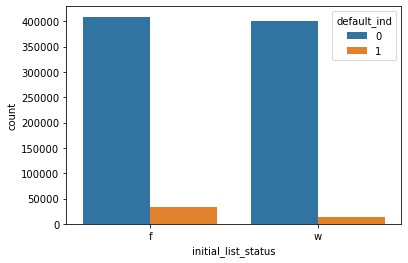

In [236]:

ax = sns.countplot(x='initial_list_status',data=df_orig,hue='default_ind')


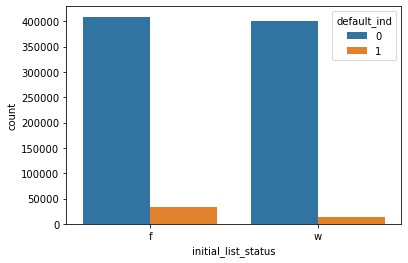

In [241]:
bx = sns.countplot(x ='initial_list_status',data=df_orig,hue='default_ind')

# Diseño del modelo

In [ ]:
X.shape

In [ ]:
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
nm = NearMiss()
X_train, y_train = nm.fit_resample(X_tr, y_tr)

In [ ]:
y_train.value_counts()

In [ ]:
X_train.shape

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=9)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
model.get_depth()

In [ ]:
model.get_params()

In [ ]:
plt.figure(figsize=(60, 30))
tree.plot_tree(model, filled=True, fontsize=10, feature_names=X_train.columns);

In [ ]:
X_train.shape

In [ ]:
df_orig.shape

In [ ]:
df_orig['default_ind'].value_counts()

In [ ]:
# Graficar el rendimiento vs tamaño de muestra

In [ ]:
!pip install seaborn